In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
pd.reset_option('display.max_rows')
sns.set_style("darkgrid")  



In [3]:
# Import excel files
xls = pd.ExcelFile("Customer_Churn_Data_Large.xlsx")

#sheet list
xls.sheet_names

['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

In [4]:
customer_demo = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name= "Customer_Demographics")
trans_hist = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name= "Transaction_History")
customer_service = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name= "Customer_Service")
online_activity = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name= "Online_Activity")
churn_status = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name= "Churn_Status")

# Data Inspection

In [5]:
print(customer_demo.info())
print(trans_hist.info())
print(customer_service.info())
print(online_activity.info())
print(churn_status.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
me

In [6]:
print("Demographics Variables", "\n",customer_demo.columns)
print("Transactional History Variables", "\n",trans_hist.columns)
print("Customer Service", "\n",customer_service.columns)
print("Online Activity", "\n",online_activity.columns)



Demographics Variables 
 Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')
Transactional History Variables 
 Index(['CustomerID', 'TransactionID', 'TransactionDate', 'AmountSpent',
       'ProductCategory'],
      dtype='object')
Customer Service 
 Index(['CustomerID', 'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus'],
      dtype='object')
Online Activity 
 Index(['CustomerID', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage'], dtype='object')


## Variable Analysis
* Demographics: All variables could provide meaningful insight and relationship to client churn
* Transactional History: Transactional ID is paired with Customer ID therefore it inheritently is a duplicate, thus we can drop TransactionID
* Customer Service: Interaction ID scenario is similar to TransactionID, therefore it can be dropped 
* Online Activity: All variables can be used for in predictive analysis, hence will not be dropped. CustomerID can be used as the merge point when concating the datasets together


# EDA 

### Customer Demographics

In [7]:
customer_demo.head(5)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [8]:
customer_demo.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,500.500000,43.267000
std,288.819436,15.242311
min,1.000000,18.000000
25%,250.750000,30.000000
50%,500.500000,43.000000
75%,750.250000,56.000000
max,1000.000000,69.000000


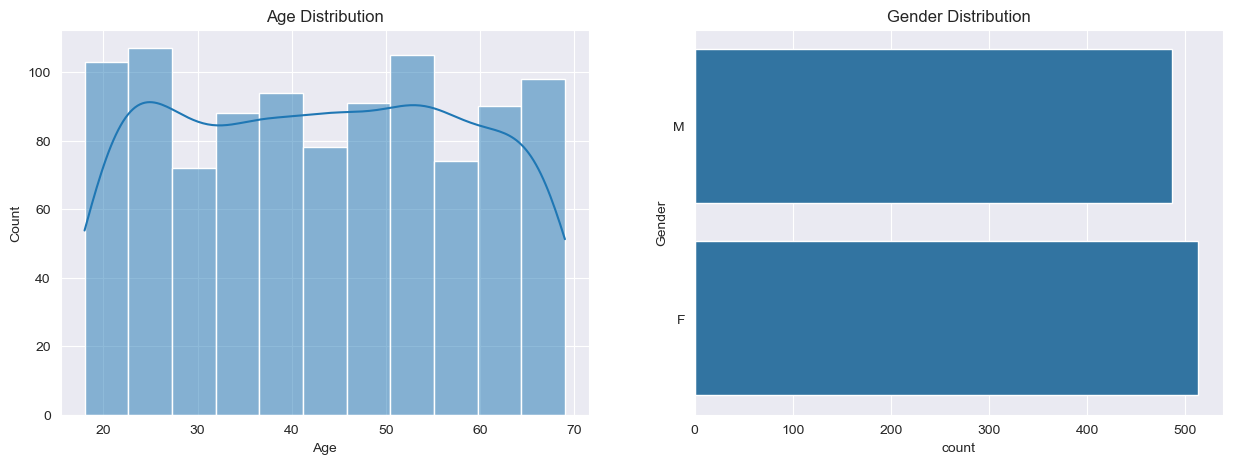

In [9]:
plt.figure(figsize=(15,5))
#kde age diagram
plt.subplot(1,2,1)
sns.histplot(data=customer_demo["Age"], kde="True")
plt.title("Age Distribution")

# Gender Barchart
plt.subplot(1,2,2)
sns.countplot(data=customer_demo["Gender"])
plt.title("Gender Distribution")
plt.show()




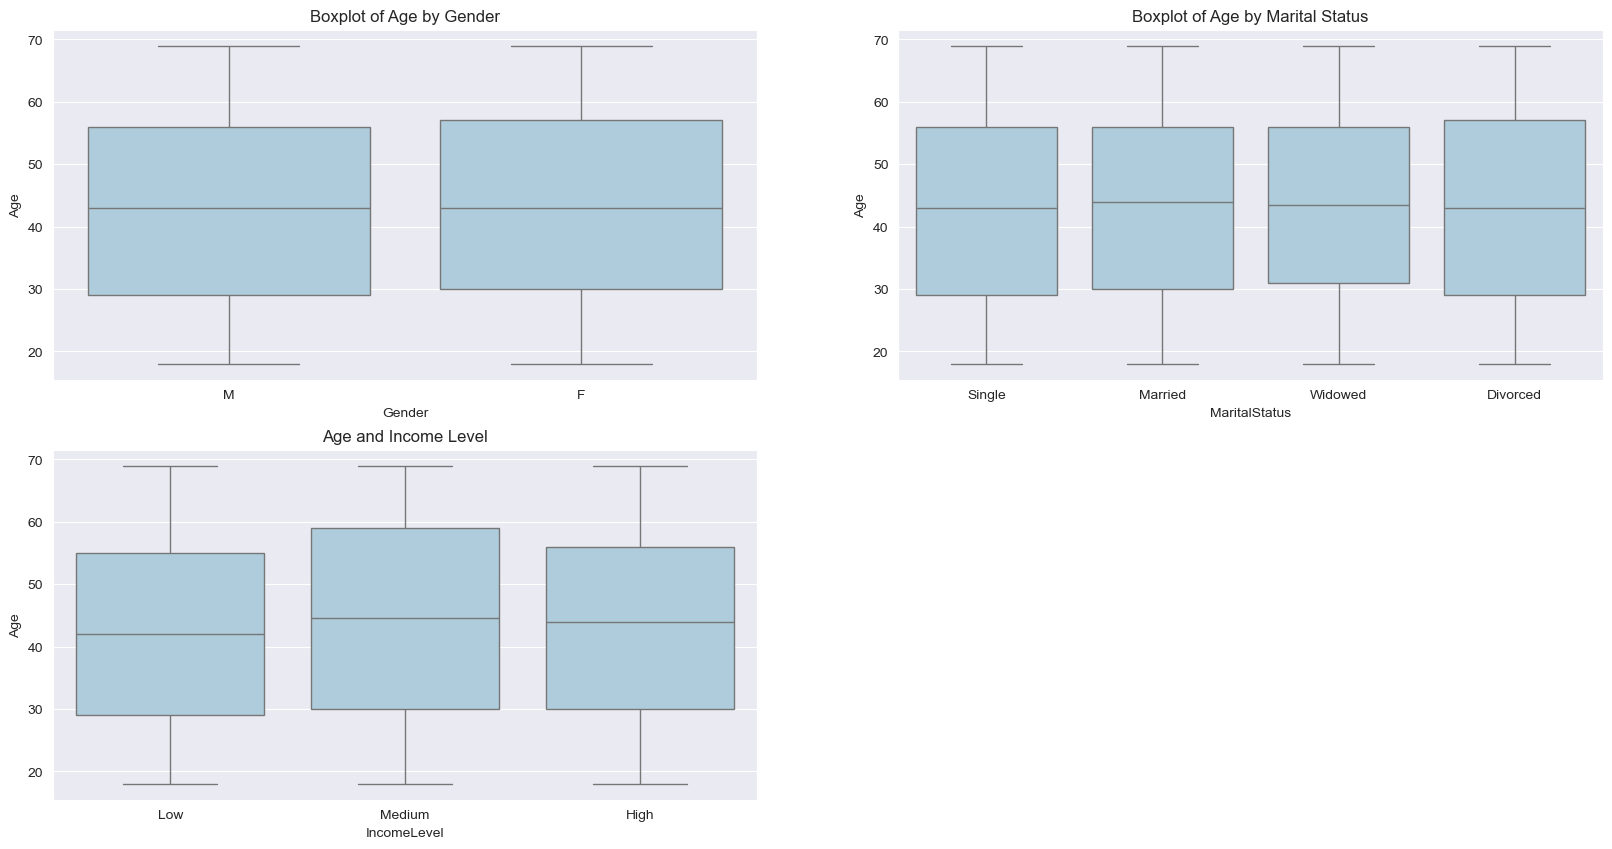

In [10]:
#Age by Gender
sns.set_palette("Paired")

plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.boxplot(x='Gender', y='Age', data=customer_demo)
plt.title('Boxplot of Age by Gender')

#Age and Martial Status
plt.subplot(2,2,2)
sns.boxplot(x='MaritalStatus', y='Age', data=customer_demo)
plt.title('Boxplot of Age by Marital Status')

#Age and Income Level
plt.subplot(2,2,3)
sns.boxplot(x="IncomeLevel", y="Age", data= customer_demo)
plt.title("Age and Income Level")
plt.show()



### 

In [11]:
trans_hist.drop(columns="TransactionID", inplace= True)
trans_hist


,CustomerID,TransactionDate,AmountSpent,ProductCategory
0,1,2022-03-27,416.50,Electronics
1,2,2022-08-08,54.96,Clothing
2,2,2022-07-25,197.50,Electronics
3,2,2022-01-25,101.31,Furniture
4,2,2022-07-24,397.37,Clothing
...,...,...,...,...
5049,1000,2022-09-08,232.06,Groceries
5050,1000,2022-12-13,324.98,Books
5051,1000,2022-06-15,375.34,Groceries
5052,1000,2022-04-08,166.73,Books


In [12]:
trans_hist.describe()

,CustomerID,TransactionDate,AmountSpent
count,5054.000000,5054,5054.000000
mean,501.424218,2022-07-01 19:25:37.158686208,250.707351
min,1.000000,2022-01-01 00:00:00,5.180000
25%,251.000000,2022-04-03 00:00:00,127.105000
50%,506.000000,2022-07-01 00:00:00,250.525000
75%,749.000000,2022-09-29 00:00:00,373.412500
max,1000.000000,2022-12-31 00:00:00,499.860000
std,285.172780,NaN,142.250838


In [13]:
list(trans_hist["ProductCategory"].unique())
trans_vcount = (trans_hist["ProductCategory"].value_counts())
print(trans_vcount)



ProductCategory
Books          1041
Groceries      1020
Electronics    1001
Clothing       1000
Furniture       992
Name: count, dtype: int64


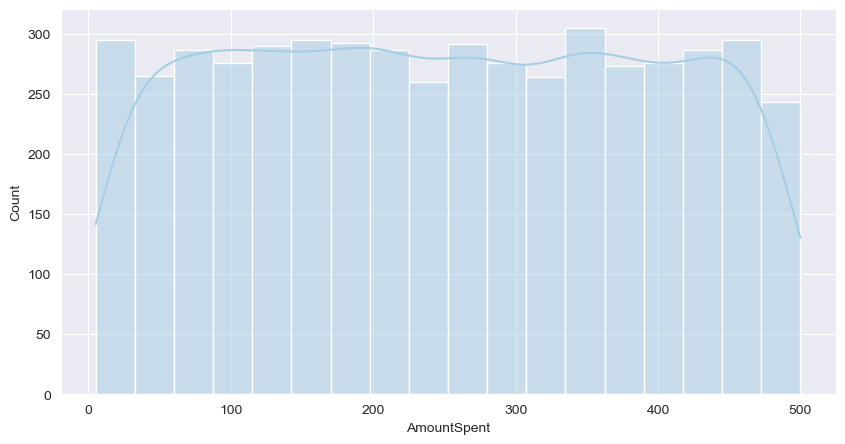

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=trans_hist["AmountSpent"], kde=True)
plt.show()

  ProductCategory  AmountSpent
0           Books    259564.99
1        Clothing    252450.70
2     Electronics    249139.79
3       Furniture    244785.82
4       Groceries    261133.65


C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\2226101870.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=amount_per_cat, x = "ProductCategory", y= "AmountSpent", marker="o", markersize = 8, linewidth = 2, legend=True, palette= "bright", markerfacecolor = "grey", markeredgecolor = "white",)


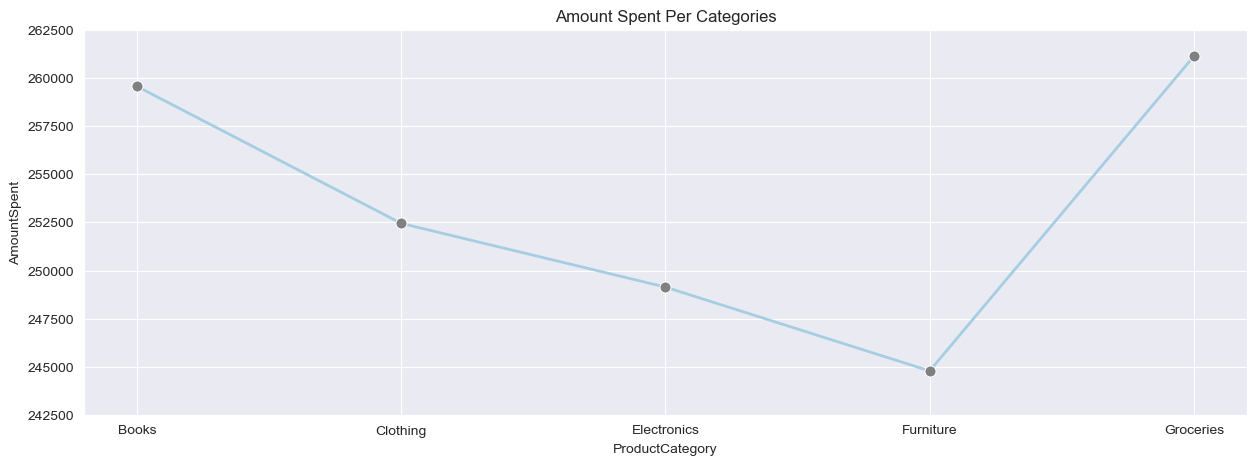

In [15]:
trans_hist["AmountSpent"].sum()
amount_per_cat = trans_hist.groupby("ProductCategory")["AmountSpent"].sum().reset_index()
print(amount_per_cat)

plt.figure(figsize= (15,5))
sns.lineplot(data=amount_per_cat, x = "ProductCategory", y= "AmountSpent", marker="o", markersize = 8, linewidth = 2, legend=True, palette= "bright", markerfacecolor = "grey", markeredgecolor = "white",)
plt.ylim(242500,262500)
plt.title("Amount Spent Per Categories")
plt.show()

(-1.099993319520525,
 1.0999921027836654,
 -1.0999999997076666,
 1.0999999938609972)

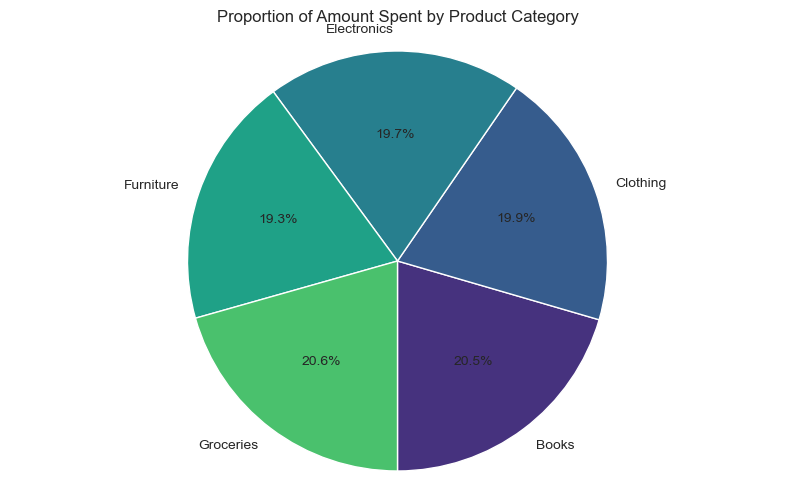

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(amount_per_cat['AmountSpent'], labels=amount_per_cat['ProductCategory'], autopct='%1.1f%%', startangle=270, colors=sns.color_palette('viridis'))
plt.title('Proportion of Amount Spent by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\3182859566.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = trans_hist["AmountSpent"].resample("M").mean()
C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\3182859566.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = trans_hist["AmountSpent"].resample("M").sum()


Text(0.5, 1.0, 'Annual Transaction Data')

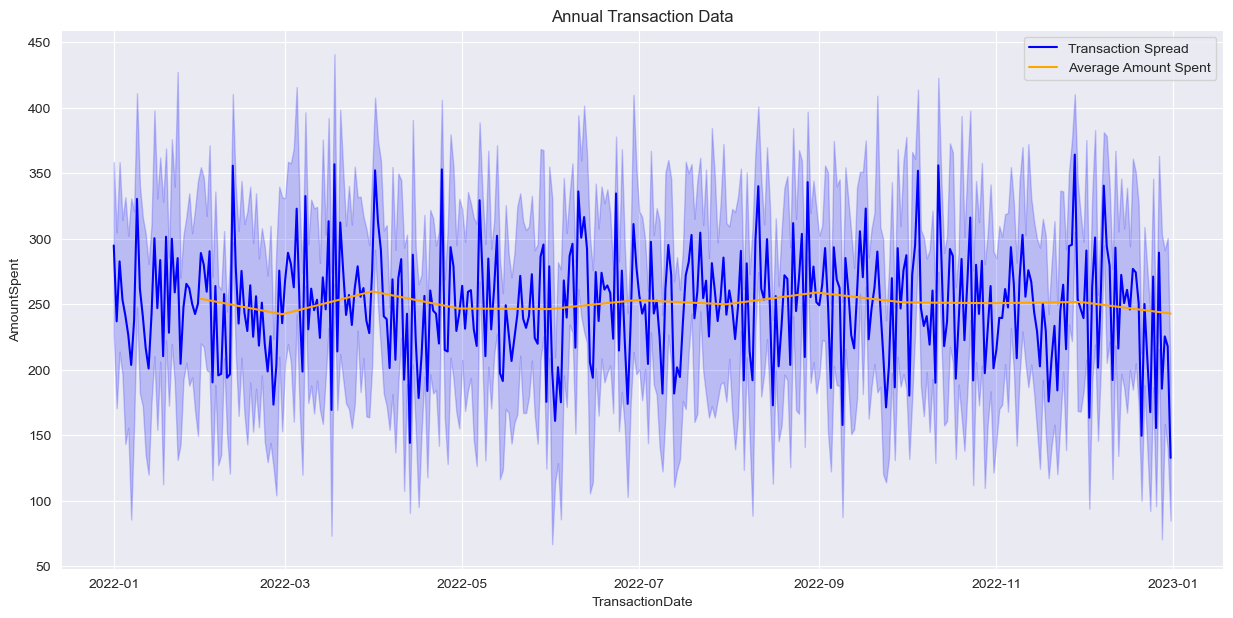

In [17]:
trans_hist.set_index('TransactionDate', inplace=True)

monthly_avg = trans_hist["AmountSpent"].resample("M").mean()
monthly_sum = trans_hist["AmountSpent"].resample("M").sum()

plt.figure(figsize= (15,7))
#normal data
sns.lineplot(x=trans_hist.index, y="AmountSpent", data= trans_hist, color = "blue", label = "Transaction Spread")
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, color = "orange", label = "Average Amount Spent")

plt.title("Annual Transaction Data")




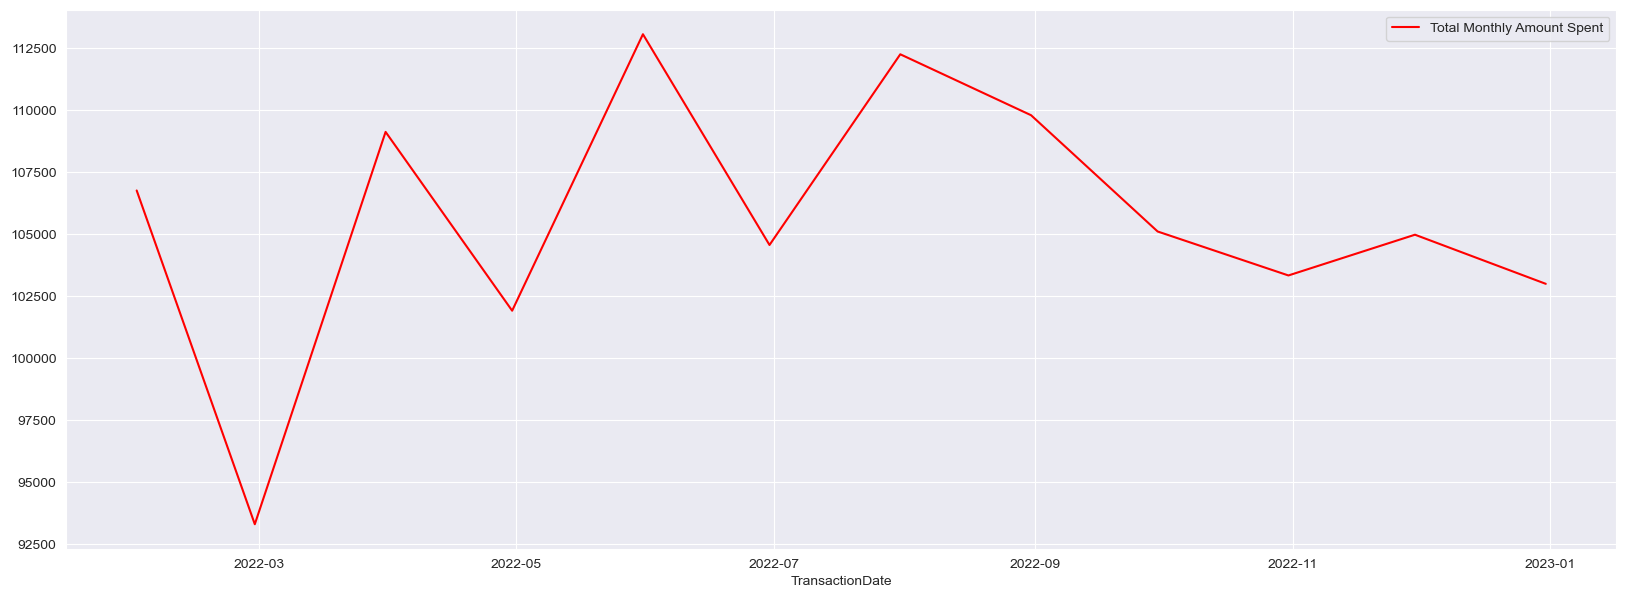

In [18]:
plt.figure(figsize= (20,7))

sns.lineplot(x=monthly_sum.index, y=monthly_sum.values, color = "red", label = "Total Monthly Amount Spent")
plt.show()


### Customer Service

In [19]:

customer_service.drop(columns= "InteractionID", inplace= True)
customer_service.head(5)

,CustomerID,InteractionDate,InteractionType,ResolutionStatus
0,1,2022-03-31,Inquiry,Resolved
1,2,2022-03-17,Inquiry,Resolved
2,3,2022-08-24,Inquiry,Resolved
3,4,2022-11-18,Inquiry,Resolved
4,4,2022-07-03,Inquiry,Unresolved


In [20]:
import gc

In [21]:
print(customer_service["InteractionType"].value_counts())
print(customer_service["ResolutionStatus"].value_counts())

InteractionType
Feedback     360
Complaint    335
Inquiry      307
Name: count, dtype: int64
ResolutionStatus
Resolved      523
Unresolved    479
Name: count, dtype: int64


C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\772957364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_service, x= "InteractionType", orient= "v", palette= "bright")
C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\772957364.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_service, x= "ResolutionStatus", orient="v", palette= "bright")


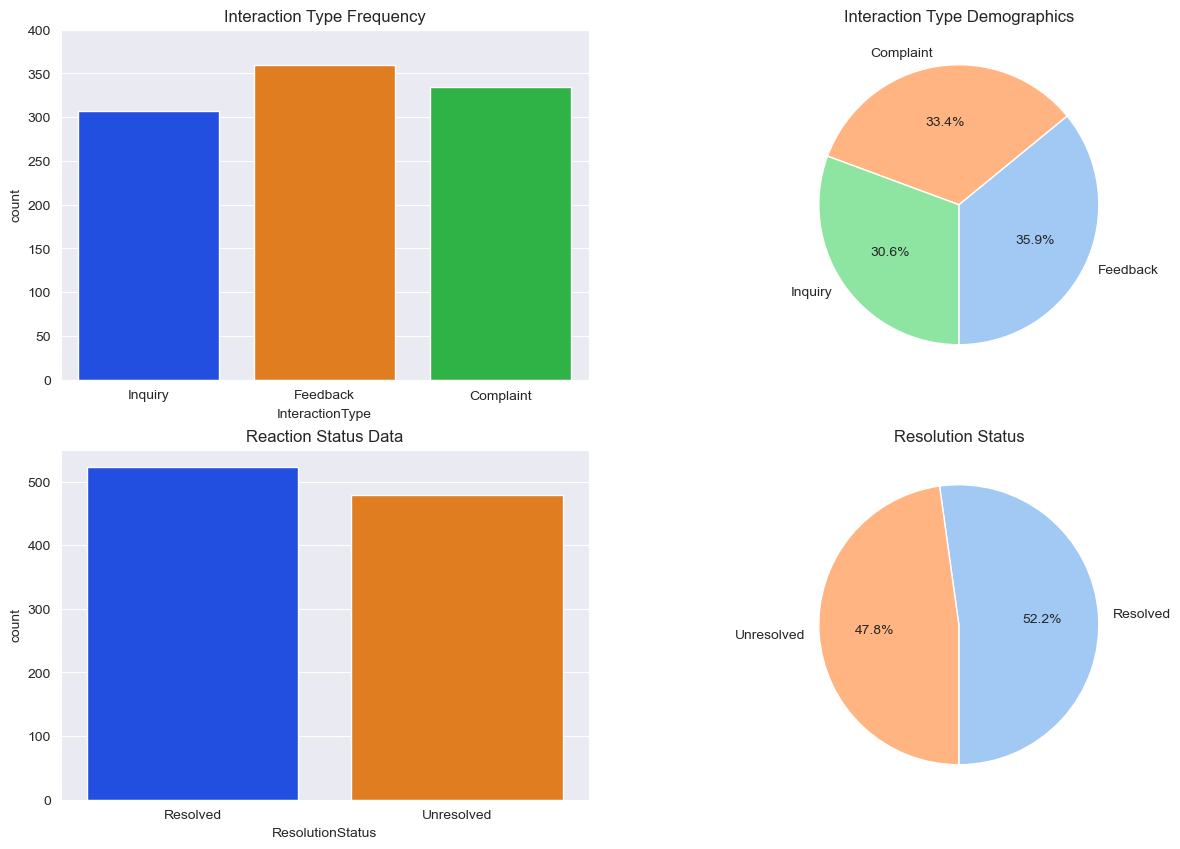

In [22]:
plt.figure(figsize= (15,10))
# **Barplot for interaction type and resolution status**

#For Interaction Type:
plt.subplot(2,2,1)
sns.countplot(data=customer_service, x= "InteractionType", orient= "v", palette= "bright")
plt.title("Interaction Type Frequency")
plt.ylim(0,400)

#For Reaction Type
plt.subplot(2,2,3)
sns.countplot(data=customer_service, x= "ResolutionStatus", orient="v", palette= "bright")
plt.title("Reaction Status Data")
plt.ylim(0,550)

# Calculate % distribution
# For Interaction Type
int_count = customer_service["InteractionType"].value_counts()
int_percent = (int_count/int_count.sum())*100
# For Resolution Type
res_count = customer_service["ResolutionStatus"].value_counts()
res_percent = (res_count/res_count.sum())*100

# Pie Chart
# For Interaction Type
plt.subplot(2,2,2)
plt.pie(int_percent, labels= int_percent.index, autopct= "%1.1f%%",startangle=270, colors=sns.color_palette('pastel'))
plt.title("Interaction Type Demographics")

#For Resolution Status
plt.subplot(2,2,4)
plt.pie(res_percent, labels=res_percent.index, autopct= "%1.1f%%", startangle=270, colors=sns.color_palette('pastel') )
plt.title("Resolution Status")

plt.show()

### Online Activity

In [23]:
online_activity.head(5)

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [24]:
service_cat = online_activity["ServiceUsage"].value_counts()
total_usage_cat = online_activity.groupby("ServiceUsage")["LoginFrequency"].sum().reset_index()
total_usage_cat

,ServiceUsage,LoginFrequency
0,Mobile App,8565
1,Online Banking,9375
2,Website,7972


C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\345611661.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= total_usage_cat, x="ServiceUsage", y="LoginFrequency", palette= "bright", ci=None)
C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\345611661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= total_usage_cat, x="ServiceUsage", y="LoginFrequency", palette= "bright", ci=None)


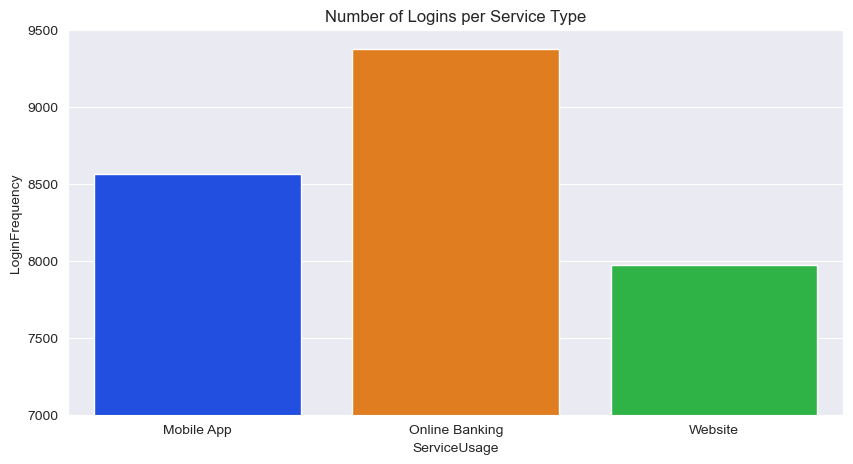

In [25]:
plt.figure(figsize=(10,5))

# Barchart LoginFreq X Service Usage
sns.barplot(data= total_usage_cat, x="ServiceUsage", y="LoginFrequency", palette= "bright", ci=None)
plt.title("Number of Logins per Service Type")
plt.ylim(7000,9500)
plt.show()

In [26]:
online_activity

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website
...,...,...,...,...
995,996,2023-01-29,38,Mobile App
996,997,2023-04-01,5,Mobile App
997,998,2023-07-10,47,Website
998,999,2023-01-08,23,Website


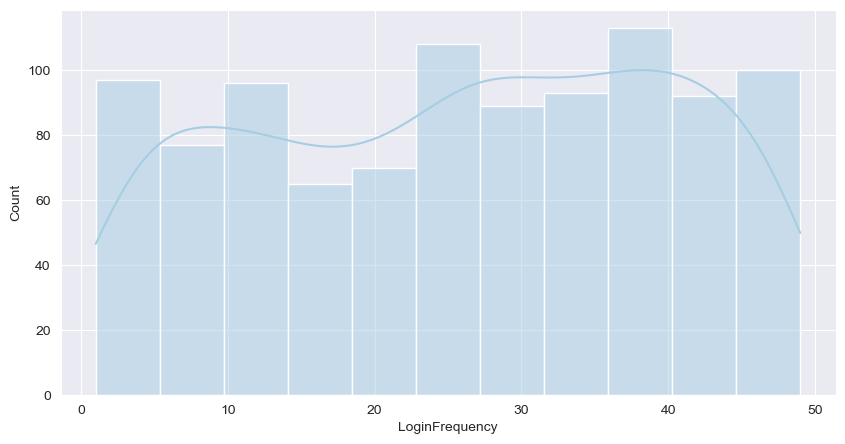

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data= online_activity["LoginFrequency"], kde=True)
plt.show()

C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\3604016966.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_month = online_activity["LoginFrequency"].resample("M").sum()
C:\Users\riyad\AppData\Local\Temp\ipykernel_12932\3604016966.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_avg = online_activity["LoginFrequency"].resample("M").mean()


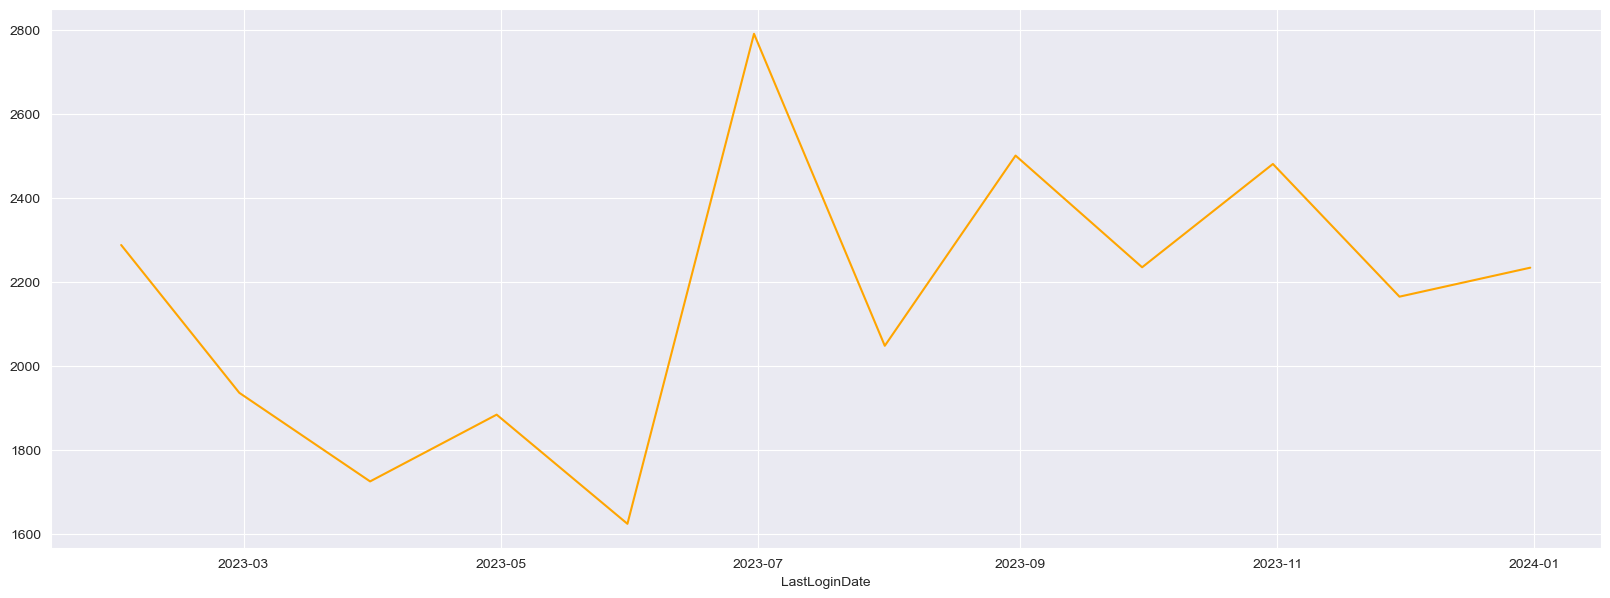

In [28]:
online_activity.set_index("LastLoginDate", inplace= True)
# convert to monthly
total_month = online_activity["LoginFrequency"].resample("M").sum()
total_avg = online_activity["LoginFrequency"].resample("M").mean()

# Create Line Plots
plt.figure(figsize=(20,7))
sns.lineplot(x = total_month.index, y = total_month.values, color = "orange")
plt.show()

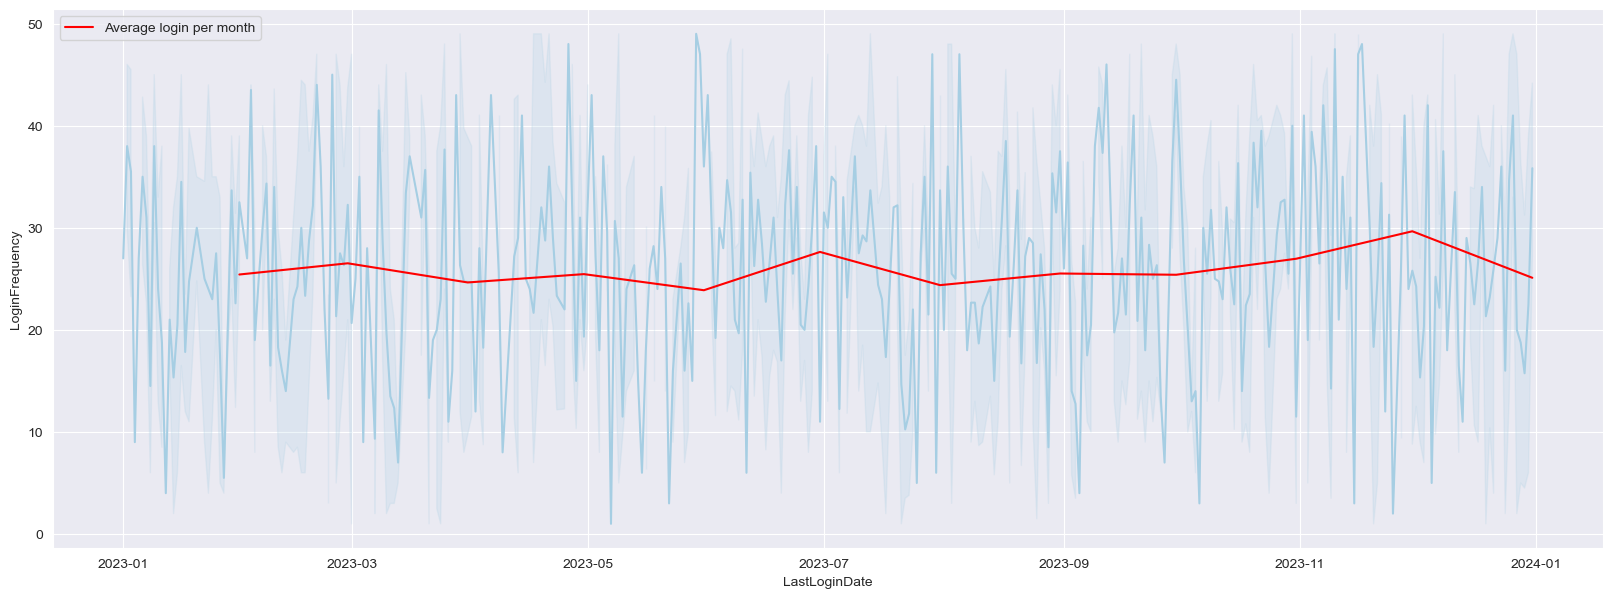

In [29]:
plt.figure(figsize = (20,7))
sns.lineplot(x=online_activity.index, y= "LoginFrequency", data= online_activity)
sns.lineplot(x = total_avg.index, y = total_avg.values, color = "red", label = "Average login per month")
plt.show() 

# Data Cleaning

In [30]:
customer_demo

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [31]:
customer_service

,CustomerID,InteractionDate,InteractionType,ResolutionStatus
0,1,2022-03-31,Inquiry,Resolved
1,2,2022-03-17,Inquiry,Resolved
2,3,2022-08-24,Inquiry,Resolved
3,4,2022-11-18,Inquiry,Resolved
4,4,2022-07-03,Inquiry,Unresolved
...,...,...,...,...
997,990,2022-10-25,Complaint,Unresolved
998,992,2022-09-29,Feedback,Unresolved
999,994,2022-07-02,Complaint,Unresolved
1000,994,2022-05-14,Complaint,Unresolved


In [32]:
trans_hist =trans_hist.reset_index()
online_activity = online_activity.reset_index()
print("Dataset Shape", "\n")
print("transaction history:","",trans_hist.shape)
print("customer demo:","",customer_demo.shape)
print("customer service:","",customer_service.shape)
print("online activity:","",online_activity.shape)
print("churn staturs:","",churn_status.shape)

Dataset Shape 

transaction history:  (5054, 4)
customer demo:  (1000, 5)
customer service:  (1002, 4)
online activity:  (1000, 4)
churn staturs:  (1000, 2)


In [33]:
print("Demographics Variables", "\n",customer_demo.columns)
print("Transactional History Variables", "\n",trans_hist.columns)
print("Customer Service", "\n",customer_service.columns)
print("Online Activity", "\n",online_activity.columns)
print("Churn Status", "\n",churn_status.columns)

Demographics Variables 
 Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')
Transactional History Variables 
 Index(['TransactionDate', 'CustomerID', 'AmountSpent', 'ProductCategory'], dtype='object')
Customer Service 
 Index(['CustomerID', 'InteractionDate', 'InteractionType', 'ResolutionStatus'], dtype='object')
Online Activity 
 Index(['LastLoginDate', 'CustomerID', 'LoginFrequency', 'ServiceUsage'], dtype='object')
Churn Status 
 Index(['CustomerID', 'ChurnStatus'], dtype='object')


In [34]:
print(trans_hist.isnull().sum(),"\n")
print(customer_demo.isnull().sum(),"\n")
print(customer_service.isnull().sum(),"\n")
print(online_activity.isnull().sum(),"\n")
print(churn_status.isnull().sum(),"\n")

TransactionDate    0
CustomerID         0
AmountSpent        0
ProductCategory    0
dtype: int64 

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64 

CustomerID          0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
dtype: int64 

LastLoginDate     0
CustomerID        0
LoginFrequency    0
ServiceUsage      0
dtype: int64 

CustomerID     0
ChurnStatus    0
dtype: int64 



zero missing values 

## Merge Datasets

In [35]:
merge_df = customer_demo.merge(trans_hist, on="CustomerID", how="left")
merge_df = merge_df.merge(customer_service, on= "CustomerID", how= "left")
merge_df = merge_df.merge(online_activity, on= "CustomerID", how="left")
merge_df = merge_df.merge(churn_status, on = "CustomerID", how= "left")



In [36]:
merge_df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionDate,AmountSpent,ProductCategory,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,2022-03-27,416.50,Electronics,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,2022-08-08,54.96,Clothing,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,2022-07-25,197.50,Electronics,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2022-01-25,101.31,Furniture,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,2022-07-24,397.37,Clothing,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,2022-09-08,232.06,Groceries,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6808,1000,34,M,Widowed,Low,2022-12-13,324.98,Books,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6809,1000,34,M,Widowed,Low,2022-06-15,375.34,Groceries,NaT,NaN,NaN,2023-08-13,22,Mobile App,0
6810,1000,34,M,Widowed,Low,2022-04-08,166.73,Books,NaT,NaN,NaN,2023-08-13,22,Mobile App,0


In [37]:
null_values = merge_df[merge_df.isnull()]

In [38]:
null_values

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionDate,AmountSpent,ProductCategory,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
6808,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
6809,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
6810,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


As we can see, there are problems with the merging of the dataset. The reasons behind this are due to multiple transaction dates & transactions (amount spent) for each customer. Therefore it is best to aggregate the amount spend and change the transaction date to number of transactions in order to solve this

In [39]:
print(trans_hist.head(10))


  TransactionDate  CustomerID  AmountSpent ProductCategory
0      2022-03-27           1       416.50     Electronics
1      2022-08-08           2        54.96        Clothing
2      2022-07-25           2       197.50     Electronics
3      2022-01-25           2       101.31       Furniture
4      2022-07-24           2       397.37        Clothing
5      2022-01-09           2       285.21     Electronics
6      2022-09-16           2       311.34     Electronics
7      2022-11-19           2       199.73       Groceries
8      2022-10-08           3       241.06           Books
9      2022-08-15           3        51.07        Clothing


In [40]:
agg_trans_hist = trans_hist.groupby("CustomerID").agg({"AmountSpent":"sum","TransactionDate":"count"}).reset_index()

In [41]:
agg_trans_hist.rename(columns={"Transactional Data" :"TransactionFreq"}, inplace=True)

In [42]:
agg_trans_hist.isnull().sum()

CustomerID         0
AmountSpent        0
TransactionDate    0
dtype: int64

We have now fixed the transactional data, now we can adjust the merged dataset

In [43]:
cleaned_df = customer_demo.merge(agg_trans_hist, on="CustomerID", how="left")
#cleaned_df = cleaned_df.merge(customer_service, on= "CustomerID", how= "left")
cleaned_df = cleaned_df.merge(online_activity, on= "CustomerID", how="left")
cleaned_df = cleaned_df.merge(churn_status, on = "CustomerID", how= "left")

In [44]:
cleaned_df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,TransactionDate,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,416.50,1,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,1547.42,7,2023-12-05,5,Website,1
2,3,18,M,Single,Low,1702.98,6,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,917.29,5,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,2001.49,8,2023-10-27,41,Website,0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,F,Single,Low,227.25,1,2023-01-29,38,Mobile App,0
996,997,19,M,Widowed,High,419.82,2,2023-04-01,5,Mobile App,0
997,998,47,M,Married,Low,252.15,1,2023-07-10,47,Website,0
998,999,23,M,Widowed,High,2393.26,9,2023-01-08,23,Website,0


In [45]:
customer_service.shape

(1002, 4)

In [46]:
customer_service

,CustomerID,InteractionDate,InteractionType,ResolutionStatus
0,1,2022-03-31,Inquiry,Resolved
1,2,2022-03-17,Inquiry,Resolved
2,3,2022-08-24,Inquiry,Resolved
3,4,2022-11-18,Inquiry,Resolved
4,4,2022-07-03,Inquiry,Unresolved
...,...,...,...,...
997,990,2022-10-25,Complaint,Unresolved
998,992,2022-09-29,Feedback,Unresolved
999,994,2022-07-02,Complaint,Unresolved
1000,994,2022-05-14,Complaint,Unresolved


In [47]:
gc.collect()

23595

In [48]:
#duplicated_cs =customer_service[customer_service.duplicated()]

#duplicated_cs

In [49]:
# Aggregate data
agg_cs_df = customer_service.groupby('CustomerID').agg(
    InteractionCount=('CustomerID', 'size'),
    LastInteraction=('InteractionDate', 'max'),
    ComplaintCount=('InteractionType', lambda x: (x == 'Complaint').sum()),
    FeedbackCount=('InteractionType', lambda x: (x == 'Feedback').sum()),
    InquiryCount=('InteractionType', lambda x: (x == 'Inquiry').sum()),
    ResolvedCount=('ResolutionStatus', lambda x: (x == 'Resolved').sum()),
    UnresolvedCount=('ResolutionStatus', lambda x: (x == 'Unresolved').sum())
).reset_index()


In [50]:
agg_cs_df

,CustomerID,InteractionCount,LastInteraction,ComplaintCount,FeedbackCount,InquiryCount,ResolvedCount,UnresolvedCount
0,1,1,2022-03-31,0,0,1,1,0
1,2,1,2022-03-17,0,0,1,1,0
2,3,1,2022-08-24,0,0,1,1,0
3,4,2,2022-11-18,0,0,2,1,1
4,6,1,2022-05-05,0,1,0,1,0
...,...,...,...,...,...,...,...,...
663,989,2,2022-10-07,2,0,0,0,2
664,990,2,2022-10-25,1,1,0,1,1
665,992,1,2022-09-29,0,1,0,0,1
666,994,2,2022-07-02,2,0,0,0,2


In [51]:
cleaned_df = cleaned_df.merge(agg_cs_df, on="CustomerID", how="left")

In [52]:
cleaned_df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,TransactionDate,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,InteractionCount,LastInteraction,ComplaintCount,FeedbackCount,InquiryCount,ResolvedCount,UnresolvedCount
0,1,62,M,Single,Low,416.50,1,2023-10-21,34,Mobile App,0,1.0,2022-03-31,0.0,0.0,1.0,1.0,0.0
1,2,65,M,Married,Low,1547.42,7,2023-12-05,5,Website,1,1.0,2022-03-17,0.0,0.0,1.0,1.0,0.0
2,3,18,M,Single,Low,1702.98,6,2023-11-15,3,Website,0,1.0,2022-08-24,0.0,0.0,1.0,1.0,0.0
3,4,21,M,Widowed,Low,917.29,5,2023-08-25,2,Website,0,2.0,2022-11-18,0.0,0.0,2.0,1.0,1.0
4,5,21,M,Divorced,Medium,2001.49,8,2023-10-27,41,Website,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,F,Single,Low,227.25,1,2023-01-29,38,Mobile App,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
996,997,19,M,Widowed,High,419.82,2,2023-04-01,5,Mobile App,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
997,998,47,M,Married,Low,252.15,1,2023-07-10,47,Website,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN
998,999,23,M,Widowed,High,2393.26,9,2023-01-08,23,Website,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [53]:
cleaned_df.duplicated().sum()

0

In [54]:
cleaned_df.to_csv(index=False)

'CustomerID,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,TransactionDate,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,InteractionCount,LastInteraction,ComplaintCount,FeedbackCount,InquiryCount,ResolvedCount,UnresolvedCount\r\n1,62,M,Single,Low,416.5,1,2023-10-21,34,Mobile App,0,1.0,2022-03-31,0.0,0.0,1.0,1.0,0.0\r\n2,65,M,Married,Low,1547.4199999999998,7,2023-12-05,5,Website,1,1.0,2022-03-17,0.0,0.0,1.0,1.0,0.0\r\n3,18,M,Single,Low,1702.98,6,2023-11-15,3,Website,0,1.0,2022-08-24,0.0,0.0,1.0,1.0,0.0\r\n4,21,M,Widowed,Low,917.29,5,2023-08-25,2,Website,0,2.0,2022-11-18,0.0,0.0,2.0,1.0,1.0\r\n5,21,M,Divorced,Medium,2001.49,8,2023-10-27,41,Website,0,,,,,,,\r\n6,57,F,Divorced,Medium,1164.29,5,2023-09-17,2,Website,0,1.0,2022-05-05,0.0,1.0,0.0,1.0,0.0\r\n7,27,F,Married,High,86.73,1,2023-01-07,32,Mobile App,0,,,,,,,\r\n8,37,M,Single,Low,2046.88,7,2023-04-22,17,Online Banking,1,2.0,2022-09-13,0.0,1.0,1.0,0.0,2.0\r\n9,39,M,Divorced,High,1317.24,5,2023-06-27,24,Website,0,1.0,2022-08-1

In [55]:
#cleaned_df.to_csv("C:\\Users\\riyad\Documents\\DS Projects\\Lloyds_Data_Sci_internship_files\\cleaned_df.csv", index=False)

Got it! Since LastInteraction represents the most recent date tied to any recorded interaction (like complaints or inquiries), it will indeed be useful to keep it connected to InteractionCount and related fields, while converting it into a more model-friendly format. Here's a refined approach:

Steps to Handle Missing Values and Transform LastInteraction
Filling Missing Values in Interaction Columns
Since missing values in columns like InteractionCount, ComplaintCount, FeedbackCount, InquiryCount, ResolvedCount, and UnresolvedCount imply "no interaction," filling these NaNs with 0 is appropriate.

In [ ]:
service_merge_col = ["InteractionCount", "ComplaintCount", "FeedbackCount", "InquiryCount", "ResolvedCount" ,"UnresolvedCount"]
cleaned_df[service_merge_col] = 